<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_Pandas_tutorial_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv"

In [7]:
air_quality = pd.read_csv(url, parse_dates=["date.utc"])
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [8]:
air_quality = air_quality.rename(columns={"date.utc" : "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [9]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [12]:
air_quality["datetime"].min() ,air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [15]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [19]:
sub = air_quality["datetime"].max() - air_quality["datetime"].min()
sub

Timedelta('44 days 23:00:00')

In [20]:
sub

Timedelta('44 days 23:00:00')

In [22]:
air_quality['month'] = air_quality["datetime"].dt.month
air_quality['day'] = air_quality["datetime"].dt.day
air_quality

,city,country,datetime,location,parameter,value,unit,month,day
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,21
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,20
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,20
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,20
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,20
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,7
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,7
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,7
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,7


In [26]:
aq_dow_loc = air_quality.groupby([air_quality["datetime"].dt.dayofweek, "location"])["value"].mean().unstack()
aq_dow_loc

location,BETR801,FR04014,London Westminster
datetime,,,
0,27.875000,24.856250,23.969697
1,22.214286,30.999359,24.885714
2,21.125000,29.165753,23.460432
3,27.500000,28.600690,24.780142
4,28.400000,31.617986,26.446809
5,33.500000,25.266154,24.977612
6,21.896552,23.274306,24.859155


In [27]:
aq_dow_loc.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='datetime')

In [29]:
aq_dow_loc.index = [w for w in "월화수목금토일"]
aq_dow_loc

location,BETR801,FR04014,London Westminster
월,27.875000,24.856250,23.969697
화,22.214286,30.999359,24.885714
수,21.125000,29.165753,23.460432
목,27.500000,28.600690,24.780142
금,28.400000,31.617986,26.446809
토,33.500000,25.266154,24.977612
일,21.896552,23.274306,24.859155


<Axes: xlabel='datetime'>

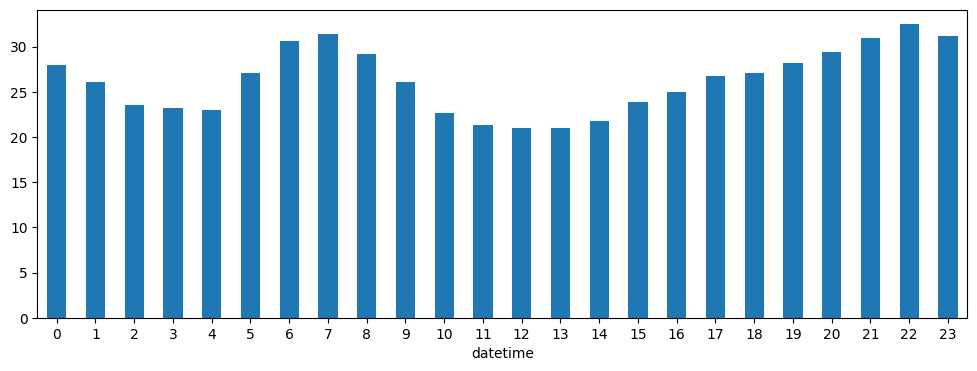

In [32]:
fig, axs = plt.subplots(figsize=(12, 4))

aqh =air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean()
aqh.plot(kind='bar', rot=0, ax=axs)

<Axes: xlabel='datetime'>

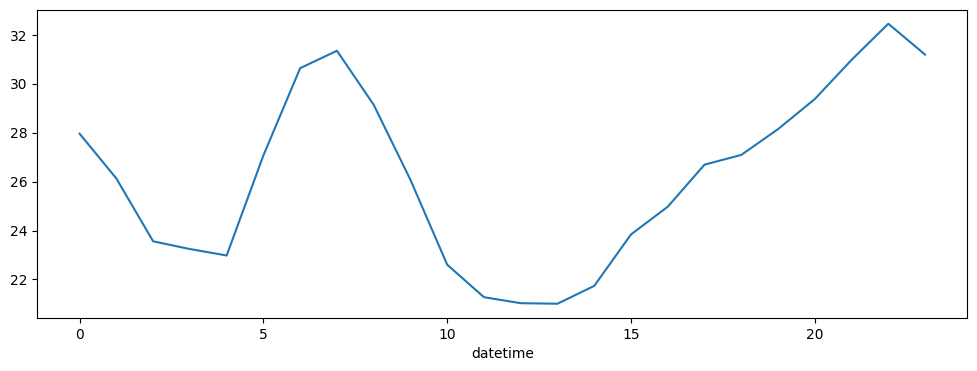

In [35]:
aqh.plot(kind='line', rot=0, figsize=(12, 4))

In [40]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [41]:
no_2.index.year, no_2.index.weekday, no_2.index.month

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033),
 Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
             ...
             6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
            dtype='int64', name='datetime', length=1033))

In [42]:
no_2["2019-05-20":"2019-05-21"].head(2)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,28.0
2019-05-20 01:00:00+00:00,17.0,12.8,28.0


<Axes: xlabel='datetime'>

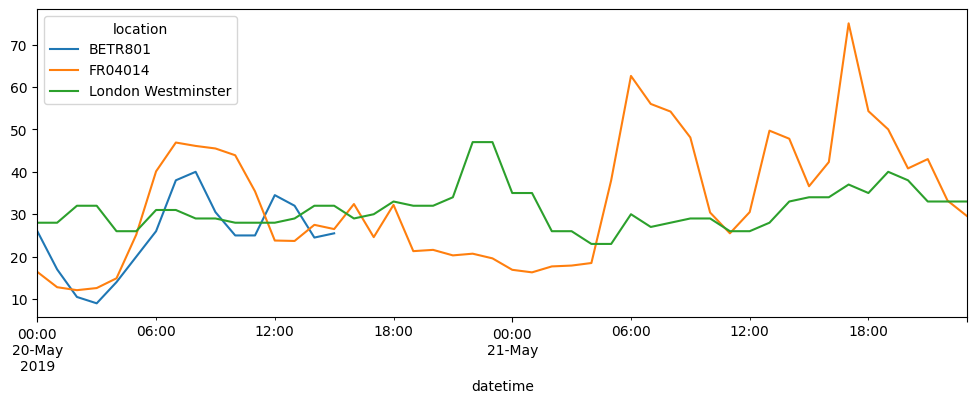

In [43]:
no_2["2019-05-20":"2019-05-21"].plot(figsize=(12, 4))

In [45]:
no_2.resample("M").max()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [39]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [46]:
monthly_max.index.freq

<MonthEnd>

<Axes: xlabel='datetime'>

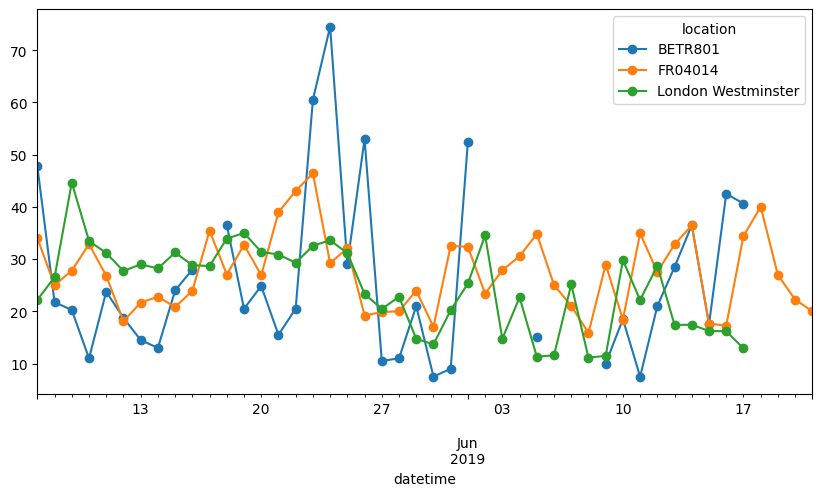

In [50]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))